In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [29]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor) # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor) # shape (200,) LongTensor = 64-bit integer

In [30]:
x, y = Variable(x), Variable(y)

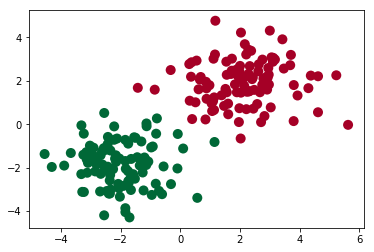

In [31]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0,cmap='RdYlGn')
plt.show()

In [44]:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

In [45]:
net = Net(2, 10, 2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [46]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


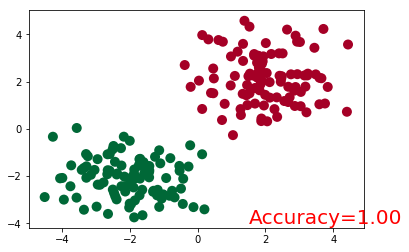

In [56]:
plt.figure()
plt.ion()
#plt.show()
for t in range(100):
    out = net(x)
    loss = loss_func(out, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 2 == 0:
        plt.cla()
        prediction = torch.max(F.softmax(out), 1)[1] #[1]最大值的位置，[0]最大值
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0,cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color': 'red'})
        #plt.pause(0.1)
plt.ioff()
plt.show()